In [26]:
import matplotlib.pyplot as plt
#import OpenEphys as oe
import numpy as np#
import pandas as pd
import os
% matplotlib notebook


In [70]:
working_directory = r"Y:\Data\Neuropixel_M1\2019-08-30_17-28-19"

probe = 2

path = os.path.join(working_directory,r'experiment1\recording1\events\Neuropix-PXI-100.0\TTL_1')#'experiment1/recording1/events/Neuropix-PXI-101.0/TTL_1')

start1 = 10633549
start2 = 37428361

In [71]:
channel_states = np.load(os.path.join(path,'channel_states.npy'))
timestamps = np.load(os.path.join(path,'timestamps.npy'))# - start1
channels = np.load(os.path.join(path,'channels.npy'))

In [72]:
channels.shape

(3444,)

In [73]:
timestamps_on = (timestamps[channel_states==1])/30000
timestamps_off = (timestamps[channel_states==-1])/30000


In [74]:
timestamps_on[0]

6454.456266666667

<IPython.core.display.Javascript object>


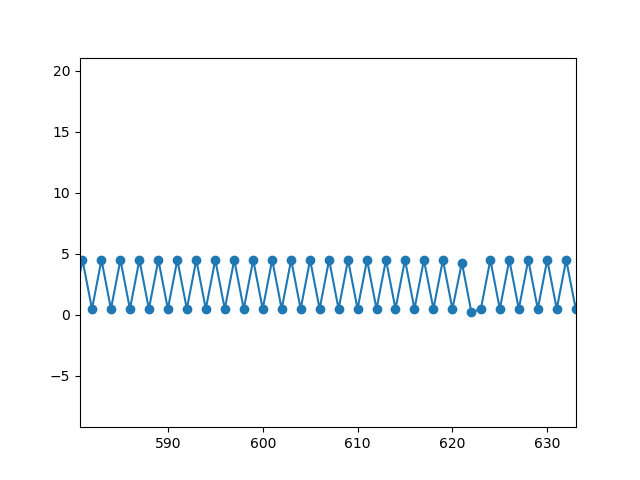

In [75]:
#plt.plot((timestamps_off[:]-timestamps_on[:]),'-o')
plt.plot(np.diff(timestamps_on[:]-timestamps_on[0]),'-o')
plt.show()

In [76]:
timestamps_pattern = timestamps_off[:]-timestamps_on[:]
np.where(timestamps_pattern<0.05)

(array([  0,  36,  37,  38, 622], dtype=int64),)

In [77]:
test0 = np.load(r"Y:\Data\Neuropixel_M1\2019-08-30_17-28-19\MUA-Analysis\timestamps\2019-08-30_17-28-19_trigger_move.npy")
test1 = np.load(r"Y:\Data\Neuropixel_M1\2019-08-30_17-28-19\MUA-Analysis\timestamps\2019-08-30_17-28-19_trigger_vib.npy")


In [78]:
np.diff(test0)

array([[ 39990.3       ,  39992.2       ,  40002.63333333,  40006.1       ,
         40014.        ,  40007.6       ,  39995.8       ,  39984.73333333,
         40009.        ,  39987.7       ,  39989.8       ,  40002.9       ,
         39995.03333333,  40026.7       ,  39996.7       ,  39981.5       ,
         40011.        ,  40014.03333333,  39991.2       ,  40002.9       ,
         39976.3       ,  39996.43333333,  40026.7       ,  39976.7       ,
         40012.        ,  39990.        ,  40000.83333333,  39990.5       ,
         40018.9       ,  40018.9       ,  39968.43333333,  40033.3       ,
         39997.2       ,  39968.2       ,  40005.93333333,  40000.        ,
         40022.8       ,  39997.9       ,  39992.8       ,  40004.83333333,
         39997.8       ,  40010.1       ,  39974.6       ,  40012.23333333,
         39999.5       ,  40001.7       ,  40000.        ,  40005.83333333,
         39999.7       ,  39987.        ,  39990.7       ,  40013.73333333,
         399

In [80]:
np.max(test1/1000)

11107.636833333334

In [81]:
ts_spk = np.load(r"Y:\Data\Neuropixel_M1\2019-08-30_17-28-19\experiment1\recording1\continuous\Neuropix-PXI-100.0\timestamps.npy")

FileNotFoundError: [Errno 2] No such file or directory: 'Y:\\Data\\Neuropixel_M1\\2019-08-30_17-28-19\\experiment1\\recording1\\continuous\\Neuropix-PXI-100.0\\timestamps.npy'

In [67]:
ts_spk[-1]/30000 

5893.6225666666669

In [ ]:
def clean_up_ian(timestamps, fail = None):
    
    if fail != None:
        timestamps = np.delete(timestamps, [fail])
        plt.plot(np.diff(timestamps),'o-')
        #plt.plot((timestamps-timestamps[0]),'o-')
        plt.show()
        
    else:
        plt.plot(np.diff(timestamps),'o-')
        #plt.plot((timestamps-timestamps[0]),'o-')
        plt.show()
    return  timestamps

In [ ]:
timestamps_on = clean_up_ian(timestamps_on[:], fail = [  14,   15,  102,  405,  406,  407,  410,  411,  446,  459,  648,
         649,  650,  651,  652,  653,  656,  925,  926, 1137, 1352, 1567,
        1612, 1974, 1975, 1977, 1978, 1979, 1980, 1981, 1982])

In [ ]:
def clean_up(working_directory,timestamps, fail = None):
    if fail != None:
        timestamps = np.delete(timestamps, [fail])
    
    wd_tmp = os.path.join(working_directory,'NationalInstruments')
    
    data_dir = [f for f in os.listdir(wd_tmp) if 'sweepParameter' in f]
    print(data_dir)
    count = 0

    for i in data_dir:
        if 'sweepParameter' in i:
            count += 1
        else:
            count = count
    print(count)
    trials = []
    ids = []
    ts_dict = {}
    #count = 1
    for i in range(count):

        path_tmp = os.path.join(wd_tmp,data_dir[i])
        metaData_tmp = pd.read_pickle(path_tmp)
        trials.append(len(metaData_tmp)*2)
        print(sum(trials))
        ids.append(data_dir[i][:3])
        print(ids)
    if timestamps.shape[0] != sum(trials):
        print('Corrupted timestamps....')

        plt.plot(np.diff(timestamps),'o-')
        #plt.plot((timestamps-timestamps[0]),'o-')
        plt.show()

       
    else:

        for i in range(count):
            ts_dict[ids[i]] = timestamps[:trials[i]]
            timestamps = np.delete(timestamps, [range(trials[i])])    
    return timestamps,ts_dict

## for deleting timestamps use ts+1 // ts = first wrong ts


In [ ]:
#timestamps_off,ts_dict_off = clean_up(working_directory,timestamps_off,fail = 404)
timestamps_on,ts_dict_on = clean_up(working_directory,timestamps_on,fail =[511])


In [ ]:
timestamps_on.size

In [ ]:
ts_dict_on['002']

In [ ]:
ids = list(ts_dict_on.keys())

In [ ]:
wd_tmp = os.path.join(working_directory,'NationalInstruments')
    
data_dir = [f for f in os.listdir(wd_tmp) if not '.npy'  in f]
    #print(data_dir)
count = 0

for i in data_dir:
    if 'sweepParameter' in i:
        count += 1
    else:
        count = count

In [ ]:
count

In [ ]:
sweepParameters_path = []
inputData_path = []
[sweepParameters_path.append(os.path.join(wd_tmp,data_dir[i])) for i in range(len(data_dir)) if 'sweepParameter' in data_dir[i]]
[inputData_path.append(os.path.join(wd_tmp,data_dir[i],'AI.npy')) for i in range(len(data_dir)) if 'AI_files_' in data_dir[i]]
    

In [ ]:
sweepParameters_path

In [ ]:
inputData_path

In [ ]:
metaData = pd.read_pickle(sweepParameters_path[0])
metaData

In [ ]:
for i in range(count):
    
    metaData = pd.read_pickle(sweepParameters_path[i])
    
    pre = metaData['Pre Stimulus Time'][0]
    post = metaData['Sweeplength'][0] - pre
    repetion = metaData['Repititions'][0]
    sweepIDs = np.unique(metaData['sweepID'])
    sweeplength = metaData['Sweeplength'][0]
    
    
        
    input_Data = np.load(inputData_path[i])
    
    #bodytemp = input_Data[1,:,:]
    #feedback_force = input_Data[2,:,:]
    #feedback = input_Data[0,:,:]
    bodytemp = input_Data[0,:,:]
    feedback_force = input_Data[1,:,:]
    feedback_3 = input_Data[2,:,:]
    feedback_4 = input_Data[3,:,:]
    feedback_5 = input_Data[4,:,:]
    feedback_1 = input_Data[5,:,:]
    feedback_2 = input_Data[6,:,:]
     
    
    
    ts_sweepstart = ts_dict_on[ids[i]][::2]
    #ts_sweepstart = ts_sweepstart -1
    ts_stimstart = ts_dict_on[ids[i]][1::2]
    #ts_stimstart = ts_stimstart -4
    
    
    Data = {}
    Data['Sweepstart'] = {}
    Data['Stimstart'] = {}
    Data['Feedback_3'] = {}
    Data['Feedback_4'] = {}
    Data['Feedback_Force'] = {}

    for ii in range(len(sweepIDs)):
        Data['Sweepstart']['{0:02d}'.format(ii)] = ts_sweepstart[metaData['sweepID'] == float(ii)]
        Data['Stimstart']['{0:02d}'.format(ii)] = ts_stimstart[metaData['sweepID'] == float(ii)]
        
        Data['Feedback_3']['{0:02d}'.format(ii)] = feedback_3[:,np.where(metaData['sweepID'] == float(ii))]
        Data['Feedback_4']['{0:02d}'.format(ii)] = feedback_4[:,np.where(metaData['sweepID'] == float(ii))]
        Data['Feedback_Force']['{0:02d}'.format(ii)] = feedback_force[:,np.where(metaData['sweepID'] == float(ii))]
        stimData = pd.DataFrame.from_dict(Data,orient = 'columns')
    stimData.to_pickle(wd_tmp+'/'+ids[i]+'_stimData_probe2.pkl')

In [ ]:
stimData

In [ ]:
ts_stimstart - ts_sweepstart

In [ ]:
stimData["Feedback_3"]["00"][:,:,:].shape

In [ ]:
% matplotlib inline

for i in range(11)[:]:
    #plt.plot(stimData["Feedback_3"]["0_feedback"][:,0,i])
    #plt.plot(stimData["Feedback_3"]["1_feedback"][:,0,i])
    plt.plot(stimData["Feedback_Force"]["{0:02d}".format(i)][:,0,:])
    #plt.plot(stimData["Feedback_3"]["03"][:,0,i])
    #plt.plot(stimData["Feedback_3"]["04"][:,0,i])
    #plt.plot(stimData["Feedback_3"]["5_feedback"][:,0,i])
    #plt.plot(stimData["Feedback_3"]["6_feedback"][:,0,i])
    #plt.plot(stimData["Feedback_3"]["7_feedback"][:,0,i])
    #plt.plot(stimData["Feedback_3"]["8_feedback"][:,0,i])
    #plt.plot(stimData["Feedback_3"]["9_feedback"][:,0,i])
    #plt.plot(stimData["Feedback_3"]["10_feedback"][:,0,i])
    #plt.plot(stimData["Feedback_3"]["11_feedback"][:,0,i])
    
    plt.show()

In [ ]:
test = r"Y:\Data\PB_DATA\Neuropixel_RawData\JPO-001991\Pre_CNo\2019-10-31_12-01-40\experiment1\recording1\continuous\Neuropix-PXI-100.0"

In [ ]:
os.path.join(test[:-1]+"{}".format(int(test[-1])+1),'continous.dat')

In [ ]:
test

In [ ]:
kilosort_output_directories = [r"F:\NeuropixelData\PWB_TL\processing\JPO-001991\Pre_CNo\2019-10-31_12-01-40\experiment1\recording1\continuous\Neuropix-PXI-100.0",
                            r"F:\NeuropixelData\PWB_TL\processing\JPO-001991\Pre_CNo\2019-10-31_12-01-40\experiment1\recording1\continuous\Neuropix-PXI-100.2"]


probe_type = '3B'



for directory in kilosort_output_directories:

    session_id = os.path.basename(directory)

    print(directory)


    if os.path.exists(os.path.join(directory,'Sorting')):
        files = (os.walk(os.path.join(directory,'Sorting')))
        try:
            os.makedirs(os.path.join(directory,'Sorting',"{}".format(int(files[-1]) + 1)))
        except:
            print('folder already created....')
        kilosort_output_tmp = os.path.join(directory,'Sorting',"{}".format(int(files[-1]) + 1))

    else:
        os.makedirs(os.path.join(directory,'Sorting','1'))
        kilosort_output_tmp = os.path.join(directory,'Sorting','1')

In [ ]:
x = os.listdir(os.path.join(directory,'Sorting'))

In [ ]:
print(x)